### Homework Assignment for Graduate Course in Healthcare Analytics
- Using DE-SynPUF files downloaded from https://www.cms.gov/Research-Statistics-Data-and-Systems/Downloadable-Public-Use-Files/SynPUFs/DE_Syn_PUF.html
- Assignment: use methods related to decision trees to predict depression as response/target

## Initial Plan
- 
### Data Transformation
- delete patients that have duplicate columns (excluding year)
- only keep first patient record with intial depression diagnosis, reasoning is that once patitent is diagonised with
  depression, any future diagnosis would not be a predictor/cause of depression
- combine patients with multiple records in a single year so we have at most one row for each patient per year
- calc and add age column
- change/enocde values in applicable columns to 0 for no and 1 for yes</br>
### EDA
- use seaborn/matplotlib to perform intial data analysis
### Apply Model
- assignment is to use decision tree/randome forest type methods
### Feature Reduction
- assignment allows removal of two columns, determine which features, if any, can be removed
### How do we judge our model?

In [345]:
# import and read file, use NaN for elements with no values
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 

df = pd.read_csv("combined_ben_sum_AddYear.csv", na_values = ['no info', '.'])
#print(df.head(5))

In [297]:
df.shape
print(df.columns)

Index(['Year', 'DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT',
       'BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE',
       'BENE_COUNTY_CD', 'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
       'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'MEDREIMB_IP', 'BENRES_IP', 'PPPYMT_IP', 'MEDREIMB_OP', 'BENRES_OP',
       'PPPYMT_OP', 'MEDREIMB_CAR', 'BENRES_CAR', 'PPPYMT_CAR'],
      dtype='object')


In [298]:
#subset of data needed to answer assignment question #4
newdf = df[['DESYNPUF_ID','Year','BENE_BIRTH_DT','BENE_SEX_IDENT_CD','BENE_RACE_CD',
            'BENE_ESRD_IND','SP_STATE_CODE','BENE_COUNTY_CD','SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD','SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']]
print(newdf.head(5))

        DESYNPUF_ID  Year  BENE_BIRTH_DT  BENE_SEX_IDENT_CD  BENE_RACE_CD  \
0  00013D2EFD8E45D1  2008       19230501                  1             1   
1  00016F745862898F  2008       19430101                  1             1   
2  0001FDD721E223DC  2008       19360901                  2             1   
3  00021CA6FF03E670  2008       19410601                  1             5   
4  00024B3D2352D2D0  2008       19360801                  1             1   

  BENE_ESRD_IND  SP_STATE_CODE  BENE_COUNTY_CD  SP_ALZHDMTA  SP_CHF  \
0             0             26             950            2       2   
1             0             39             230            2       2   
2             0             39             280            2       2   
3             0              6             290            2       2   
4             0             52             590            2       2   

   SP_CHRNKIDN  SP_CNCR  SP_COPD  SP_DEPRESSN  SP_DIABETES  SP_ISCHMCHT  \
0            2        2        2   

In [299]:
newdf.shape

(6873274, 19)

In [300]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6873274 entries, 0 to 6873273
Data columns (total 19 columns):
DESYNPUF_ID          object
Year                 int64
BENE_BIRTH_DT        int64
BENE_SEX_IDENT_CD    int64
BENE_RACE_CD         int64
BENE_ESRD_IND        object
SP_STATE_CODE        int64
BENE_COUNTY_CD       int64
SP_ALZHDMTA          int64
SP_CHF               int64
SP_CHRNKIDN          int64
SP_CNCR              int64
SP_COPD              int64
SP_DEPRESSN          int64
SP_DIABETES          int64
SP_ISCHMCHT          int64
SP_OSTEOPRS          int64
SP_RA_OA             int64
SP_STRKETIA          int64
dtypes: int64(17), object(2)
memory usage: 996.3+ MB


# Data Transformation

In [301]:
# checking to see how many duplicate rows, all columns except year
# don't want to skew results if have same patient over 2008-2010 with same conditions repeated each year
# only want to include if patient has developed new conditions
dup_df = newdf[newdf.duplicated(['DESYNPUF_ID','BENE_BIRTH_DT','BENE_SEX_IDENT_CD','BENE_RACE_CD',
            'BENE_ESRD_IND','SP_STATE_CODE','BENE_COUNTY_CD','SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD','SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA']) == True].sort_values(by='DESYNPUF_ID')

In [302]:
#display(dup_df)
dup_df.shape

(1424410, 19)

In [346]:
# removing duplicate rows, 1424410 removed
df_no_dup_records_1 = newdf.drop_duplicates(['DESYNPUF_ID','BENE_BIRTH_DT','BENE_SEX_IDENT_CD','BENE_RACE_CD',
            'BENE_ESRD_IND','SP_STATE_CODE','BENE_COUNTY_CD','SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD','SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA'], keep='first')

In [349]:
df_no_dup_records_1.shape

(5448864, 19)

In [350]:
# also remove all recorcds after patient's first diagnosis, any future conditions post-depression diagnosis would not be a 
# predictor or cause of depression
df_no_dup_records = df_no_dup_records_1.drop_duplicates(['DESYNPUF_ID','BENE_BIRTH_DT','SP_DEPRESSN'], keep='first')

In [351]:
#  2,291,711‬ rows removed
df_no_dup_records.shape

(3157153, 19)

In [352]:
#calculate age (year column - year from BENE_BIRTH_DT)
#newdf["Birth_Year"] = pd.to_datetime(newdf['BENE_BIRTH_DT']).dt.year
df_no_dup_records.loc[:,'Age'] = df_no_dup_records.loc[:,'Year'] - (pd.to_datetime(newdf.loc[:,'BENE_BIRTH_DT'],format='%Y%m%d').dt.year)

In [354]:
#display and check age calculation working as expected
display(df_no_dup_records.head(5))

,DESYNPUF_ID,Year,BENE_BIRTH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Age
0,00013D2EFD8E45D1,2008,19230501,1,1,0,26,950,2,2,2,2,2,2,2,2,2,2,2,85.0
1,00016F745862898F,2008,19430101,1,1,0,39,230,2,2,2,2,2,2,2,2,2,2,2,65.0
2,0001FDD721E223DC,2008,19360901,2,1,0,39,280,2,2,2,2,2,2,2,2,2,2,2,72.0
3,00021CA6FF03E670,2008,19410601,1,5,0,6,290,2,2,2,2,2,2,2,2,2,2,2,67.0
4,00024B3D2352D2D0,2008,19360801,1,1,0,52,590,2,2,2,2,2,2,2,2,1,2,2,72.0


In [359]:
# checking for any patients with multiple recods in one year (should only have one patient summary per year)
df_dup_record_year = df_no_dup_records[df_no_dup_records.duplicated(['DESYNPUF_ID','Year']) == True].sort_values(by='DESYNPUF_ID')

In [360]:
df_dup_record_year.shape
# returned 0 rows so we don't have any rows with duplicate patient ID and year

(0, 20)

In [361]:
# checking for any null values that may need transforming
df_dup_record_year.isnull()
# returned 0

,DESYNPUF_ID,Year,BENE_BIRTH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Age


In [362]:
display(df_no_dup_records.head(5))

,DESYNPUF_ID,Year,BENE_BIRTH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Age
0,00013D2EFD8E45D1,2008,19230501,1,1,0,26,950,2,2,2,2,2,2,2,2,2,2,2,85.0
1,00016F745862898F,2008,19430101,1,1,0,39,230,2,2,2,2,2,2,2,2,2,2,2,65.0
2,0001FDD721E223DC,2008,19360901,2,1,0,39,280,2,2,2,2,2,2,2,2,2,2,2,72.0
3,00021CA6FF03E670,2008,19410601,1,5,0,6,290,2,2,2,2,2,2,2,2,2,2,2,67.0
4,00024B3D2352D2D0,2008,19360801,1,1,0,52,590,2,2,2,2,2,2,2,2,1,2,2,72.0


In [363]:
print(df_no_dup_records.columns)

Index(['DESYNPUF_ID', 'Year', 'BENE_BIRTH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD',
       'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA',
       'SP_STRKETIA', 'Age'],
      dtype='object')


In [364]:
# for each of the chronic condition col, prev data was 2 = no and 1 = yes
# replace 2 with 0 so have 0 = no and 1 = yes
for column in range(8,19):
    df_no_dup_records.iloc[:,column] = df_no_dup_records.iloc[:,column].replace(2,0)
# for BENE_ESRD_IND replace 'Y' with 1, 'N' is already set to 0
df_no_dup_records.loc[:,'BENE_ESRD_IND'] = df_no_dup_records.loc[:,'BENE_ESRD_IND'].replace('Y',1)

In [365]:
display(df_no_dup_records.head(5))

,DESYNPUF_ID,Year,BENE_BIRTH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Age
0,00013D2EFD8E45D1,2008,19230501,1,1,0,26,950,0,0,0,0,0,0,0,0,0,0,0,85.0
1,00016F745862898F,2008,19430101,1,1,0,39,230,0,0,0,0,0,0,0,0,0,0,0,65.0
2,0001FDD721E223DC,2008,19360901,2,1,0,39,280,0,0,0,0,0,0,0,0,0,0,0,72.0
3,00021CA6FF03E670,2008,19410601,1,5,0,6,290,0,0,0,0,0,0,0,0,0,0,0,67.0
4,00024B3D2352D2D0,2008,19360801,1,1,0,52,590,0,0,0,0,0,0,0,0,1,0,0,72.0


In [203]:
#df_no_dup_records.loc[:,'BENE_SEX_IDENT_CD'] = df_no_dup_records.loc[:,'BENE_SEX_IDENT_CD'].replace({1:'M',2:'F'})
#df_no_dup_records.loc[:,'BENE_RACE_CD'] = df_no_dup_records.loc[:,'BENE_RACE_CD'].replace({1:'White',2:'Black',3:'Other', 5:'Hispanic'})

In [366]:
display(df_no_dup_records.head(5))

,DESYNPUF_ID,Year,BENE_BIRTH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,Age
0,00013D2EFD8E45D1,2008,19230501,1,1,0,26,950,0,0,0,0,0,0,0,0,0,0,0,85.0
1,00016F745862898F,2008,19430101,1,1,0,39,230,0,0,0,0,0,0,0,0,0,0,0,65.0
2,0001FDD721E223DC,2008,19360901,2,1,0,39,280,0,0,0,0,0,0,0,0,0,0,0,72.0
3,00021CA6FF03E670,2008,19410601,1,5,0,6,290,0,0,0,0,0,0,0,0,0,0,0,67.0
4,00024B3D2352D2D0,2008,19360801,1,1,0,52,590,0,0,0,0,0,0,0,0,1,0,0,72.0


# Exploratory Data Analysis

In [367]:
# looking at count of catagorical data
cols = ['BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD']
for name in cols:
    print(name,':')
    print(df_no_dup_records[name].value_counts(),'\n')

BENE_RACE_CD :
1    2626556
2     330738
3     127525
5      72334
Name: BENE_RACE_CD, dtype: int64 

BENE_ESRD_IND :
0    2878460
1     278693
Name: BENE_ESRD_IND, dtype: int64 

SP_STATE_CODE :
5     270611
10    213911
45    187856
33    182333
39    138779
14    122050
36    119260
23    109962
34    107156
31     89144
11     86154
49     78536
44     75446
22     71055
15     68359
1      67493
26     65916
52     64596
50     60796
3      59749
42     53373
21     53235
24     51938
18     51373
6      49344
4      47441
19     46587
37     45435
38     42955
54     41153
7      40738
16     37229
25     36813
17     31127
51     30156
32     27978
46     22780
29     21703
28     19753
20     19525
13     17477
30     17348
41     16712
12     14400
8      13055
27     12412
53     11432
43     11029
35     10946
47      9357
9       7433
2       5754
Name: SP_STATE_CODE, dtype: int64 

BENE_COUNTY_CD :
200    92089
10     85542
20     79630
0      78449
60     70578
90     640

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt
df_no_dup_records['SP_DEPRESSN'].value_counts()

0    2202849
1     954304
Name: SP_DEPRESSN, dtype: int64

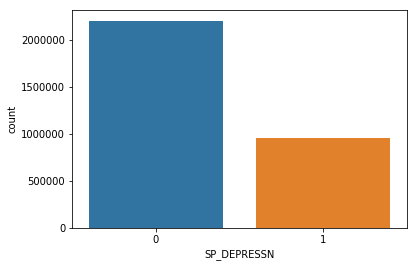

In [369]:
sns.countplot(x='SP_DEPRESSN', data=df_no_dup_records)

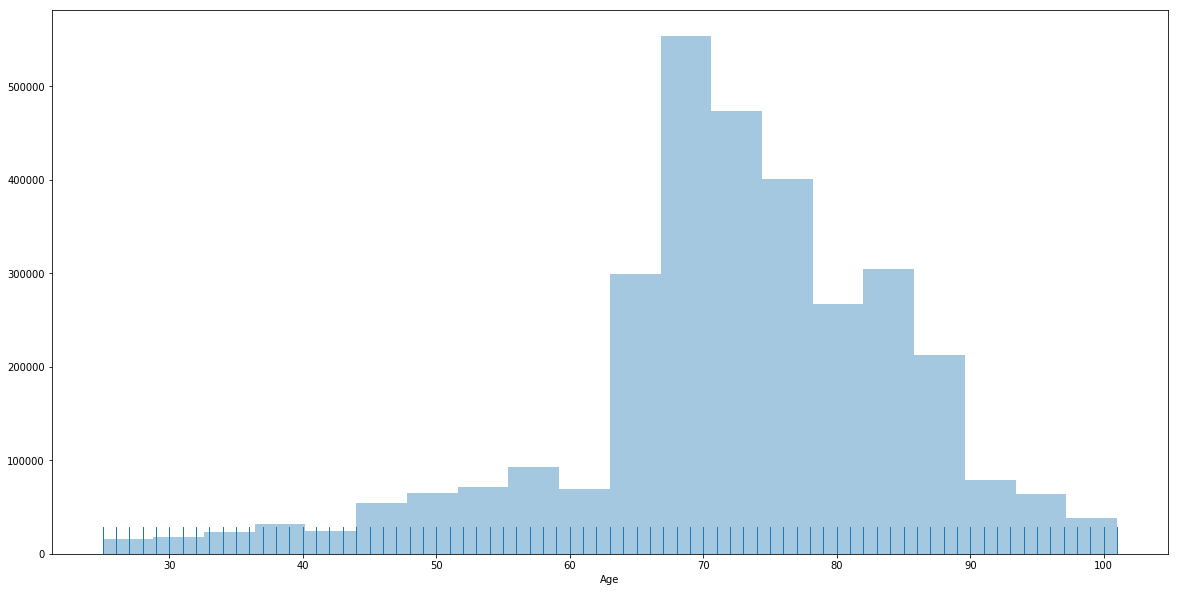

In [388]:
# Age
x=df_no_dup_records['Age']
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.distplot(x, bins=20, kde=False, rug=True,ax=ax);

In [ ]:
# State
x=df_no_dup_records['SP_STATE_CODE']
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.distplot(x, bins=20, kde=False, rug=True,ax=ax);

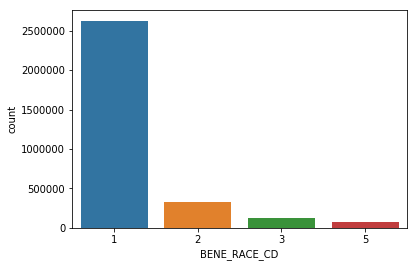

In [370]:
# Race
sns.countplot(x='BENE_RACE_CD', data=df_no_dup_records)

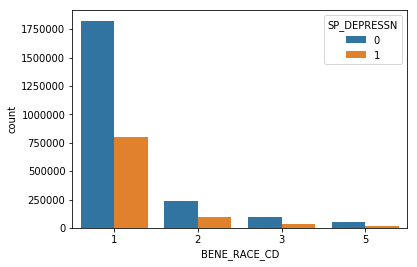

In [371]:
# Depression frequency for race catagory
#sns.catplot(x='BENE_RACE_CD', col='', kind='count', data=dataset)
sns.countplot(data=df_no_dup_records,x='BENE_RACE_CD',hue='SP_DEPRESSN')

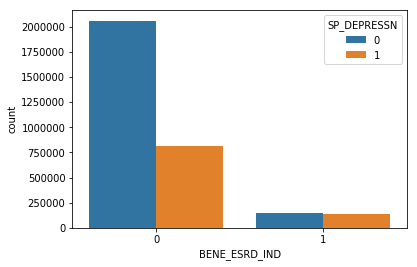

In [372]:
# End stage renal disease Indicator
# Chronic kidney disease (CKD) and ESRD result in poor quality of life and premature death. 
# ESRD is very costly to treat, such that nearly 25% of the Medicare budget is used to treat people with CKD and ESRD. 
# Diabetes is the most common cause of kidney failure.
# 0 = No, 1 = Yes
sns.countplot(data=df_no_dup_records,x='BENE_ESRD_IND',hue='SP_DEPRESSN')

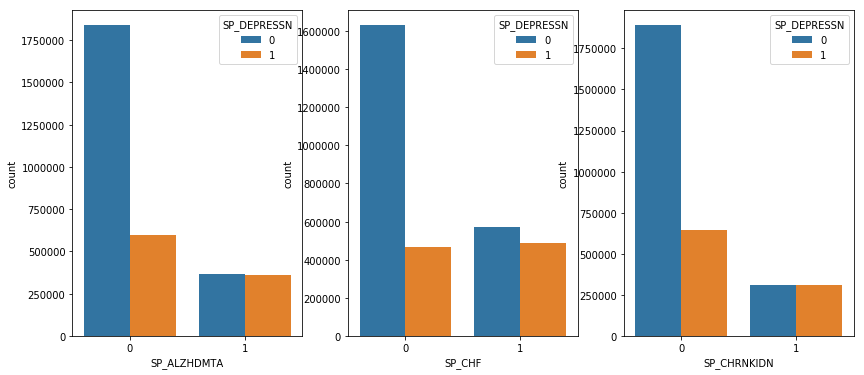

In [373]:
#g = sns.FacetGrid(df_no_dup_records, col="time")
#g.map(plt.hist, "tip");
pltdf=df_no_dup_records[['SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD',
        'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA',
       'SP_STRKETIA', 'SP_DEPRESSN']]

fig, ax =plt.subplots(1,3)
fig.set_size_inches(14, 6)
sns.countplot(data=df_no_dup_records,x='SP_ALZHDMTA',hue='SP_DEPRESSN',ax=ax[0])
sns.countplot(data=df_no_dup_records,x='SP_CHF',hue='SP_DEPRESSN',ax=ax[1])
sns.countplot(data=df_no_dup_records,x='SP_CHRNKIDN',hue='SP_DEPRESSN',ax=ax[2])

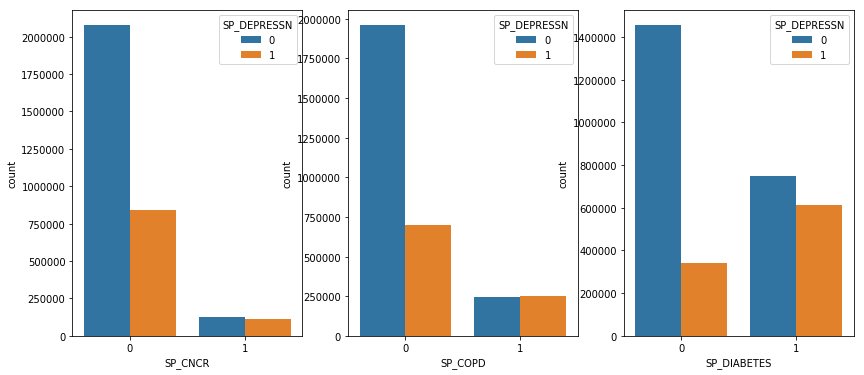

In [374]:
fig, ax =plt.subplots(1,3)
fig.set_size_inches(14, 6)
sns.countplot(data=df_no_dup_records,x='SP_CNCR',hue='SP_DEPRESSN',ax=ax[0])
sns.countplot(data=df_no_dup_records,x='SP_COPD',hue='SP_DEPRESSN',ax=ax[1])
sns.countplot(data=df_no_dup_records,x='SP_DIABETES',hue='SP_DEPRESSN',ax=ax[2])

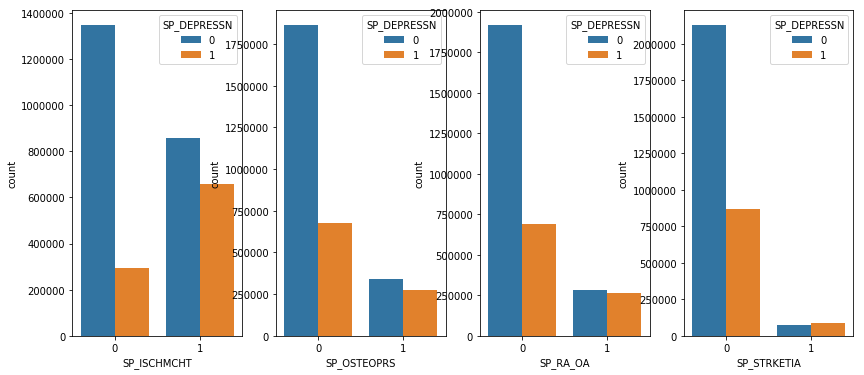

In [375]:
fig, ax =plt.subplots(1,4)
fig.set_size_inches(14, 6)
sns.countplot(data=df_no_dup_records,x='SP_ISCHMCHT',hue='SP_DEPRESSN',ax=ax[0])
sns.countplot(data=df_no_dup_records,x='SP_OSTEOPRS',hue='SP_DEPRESSN',ax=ax[1])
sns.countplot(data=df_no_dup_records,x='SP_RA_OA',hue='SP_DEPRESSN',ax=ax[2])
sns.countplot(data=df_no_dup_records,x='SP_STRKETIA',hue='SP_DEPRESSN',ax=ax[3])

# Applying Machine Learning Model

In [394]:
print(df_no_dup_records.columns)

Index(['DESYNPUF_ID', 'Year', 'BENE_BIRTH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'BENE_ESRD_IND', 'SP_STATE_CODE', 'BENE_COUNTY_CD',
       'SP_ALZHDMTA', 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD',
       'SP_DEPRESSN', 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA',
       'SP_STRKETIA', 'Age'],
      dtype='object')


In [407]:
# split data into train/test
X = df_no_dup_records.iloc[:,[3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19]].values
y = df_no_dup_records.iloc[:,13].values

#Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [408]:
#Fitting Classifier to Training Set. Create a classifier object here and call it classifierObj
from sklearn.tree import DecisionTreeClassifier
#classifierObj= DecisionTreeClassifier(criterion='entropy')
classifierObj = DecisionTreeClassifier(criterion='gini', max_depth=7, min_samples_split=150)
classifierObj.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=150,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [409]:
#K-Fold Cross Validation
from sklearn.model_selection import cross_val_score
modelAccuracies= cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print(modelAccuracies.mean())
print(modelAccuracies.std())

0.7135434407596554
0.0006417320735078813


In [401]:
#Making predictions on the Test Set
y_pred= classifierObj.predict(X_test)

#Evaluating the predictions using a Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[603405  57185]
 [214694  71862]]


In [410]:
score = classifierObj.score(X_test, y_test)
print(score)

0.7129492179663959


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.733


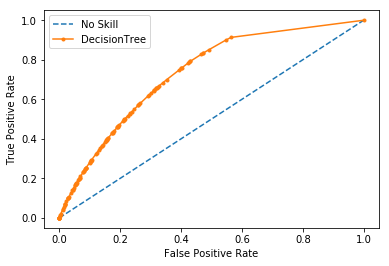

In [427]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifierObj.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DecisionTree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

DecisionTree: f1=0.346 auc=0.502


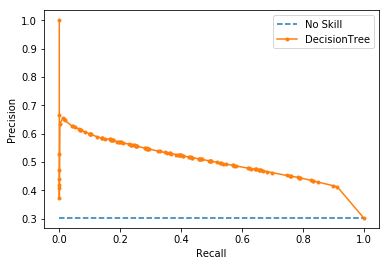

In [432]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict probabilities
lr_probs = classifierObj.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = classifierObj.predict(X_test)
lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('DecisionTree: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='DecisionTree')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()